<a href="https://colab.research.google.com/github/maishajarin/Moon-ML/blob/main/Moon_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load data**

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/maishajarin/Moon-ML/main/bounding_boxes.csv')
df

,Frame,TopLeftCornerX,TopLeftCornerY,Length,Height
0,1,278.5,192.5,56,38
1,2,599.5,151.5,121,130
2,3,5.5,46.5,90,87
3,5,239.5,101.5,103,21
4,6,682.5,124.5,34,26
...,...,...,...,...,...
18862,9764,131.5,251.5,170,111
18863,9764,255.5,120.5,35,39
18864,9764,282.5,82.5,31,21
18865,9766,450.5,67.5,67,53


# Data preparation

## Data separation as X and y

In [2]:
y = df['TopLeftCornerY']
y

0        192.5
1        151.5
2         46.5
3        101.5
4        124.5
         ...  
18862    251.5
18863    120.5
18864     82.5
18865     67.5
18866     99.5
Name: TopLeftCornerY, Length: 18867, dtype: float64

In [3]:
X = df.drop('TopLeftCornerY', axis=1)
X

,Frame,TopLeftCornerX,Length,Height
0,1,278.5,56,38
1,2,599.5,121,130
2,3,5.5,90,87
3,5,239.5,103,21
4,6,682.5,34,26
...,...,...,...,...
18862,9764,131.5,170,111
18863,9764,255.5,35,39
18864,9764,282.5,31,21
18865,9766,450.5,67,53


## Data splitting

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [5]:

X_train

,Frame,TopLeftCornerX,Length,Height
17685,9102,542.5,51,22
14165,7285,0.5,81,74
15729,8117,41.5,66,23
17294,8926,587.5,33,22
6444,3322,338.5,58,47
...,...,...,...,...
16304,8422,77.5,60,39
79,46,0.5,47,82
12119,6264,400.5,33,37
14147,7281,638.5,29,23


In [6]:
X_test

,Frame,TopLeftCornerX,Length,Height
5653,2916,433.5,178,107
13597,7060,475.5,111,81
11801,6101,61.5,22,21
18529,9599,80.5,39,27
12851,6669,552.5,62,51
...,...,...,...,...
5763,2973,24.5,98,73
10623,5503,112.5,89,72
9977,5163,474.5,43,40
3639,1838,0.5,81,84


#**Model Building**

## Linear Regression

## Training the model

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
LinearRegression()

LinearRegression()

## Applying the model to make a prediction

In [9]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [10]:

y_lr_train_pred

array([174.3853866 , 167.89547272, 180.33302778, ..., 164.18232152,
       166.90068493, 166.14605448])

In [11]:
y_lr_test_pred

array([185.61092148, 173.357538  , 167.25283697, ..., 166.05635645,
       164.56061551, 166.44767672])

## Evaluate model performance

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [13]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  10203.962729836816
LR R2 (Train):  0.015152334155368319
LR MSE (Test):  10101.774311783864
LR R2 (Test):  0.01781764204454306


In [14]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']


In [15]:
lr_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,10203.96273,0.015152,10101.774312,0.017818


# Random Forest

## Training the model

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

## Applying the model to make a prediction

In [17]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

## Evaluate model performance

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [19]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,10054.795007,0.029549,10004.849501,0.027242


# Model comparison

In [22]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [21]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,10203.96273,0.015152,10101.774312,0.017818
1,Random forest,10054.795007,0.029549,10004.849501,0.027242


# Data visualization of prediction results

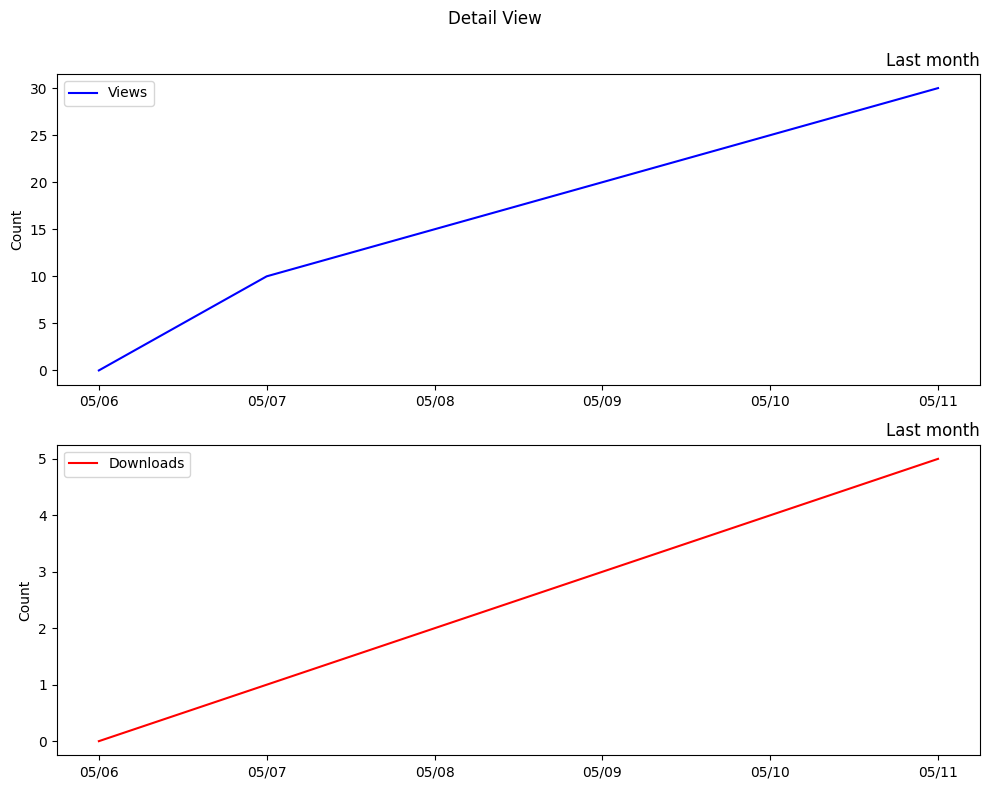

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming 'dates' is a pandas DatetimeIndex
dates = pd.date_range('20230506', periods=6)

# Convert dates to matplotlib date numbers
dates = mdates.date2num(dates.to_pydatetime())

# Your plotting code here
# ...

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Detail View')

# Plot 'Views' graph
ax1.plot_date(dates, views, 'b-', label='Views')
ax1.set_ylabel('Count')
ax1.legend(loc='upper left')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax1.set_title('Last month', loc='right')

# Plot 'Downloads' graph
ax2.plot_date(dates, downloads, 'r-', label='Downloads')
ax2.set_ylabel('Count')
ax2.legend(loc='upper left')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax2.set_title('Last month', loc='right')

# Adjust layout and show plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
